<script>
  (function(i,s,o,g,r,a,m){i['GoogleAnalyticsObject']=r;i[r]=i[r]||function(){
  (i[r].q=i[r].q||[]).push(arguments)},i[r].l=1*new Date();a=s.createElement(o),
  m=s.getElementsByTagName(o)[0];a.async=1;a.src=g;m.parentNode.insertBefore(a,m)
  })(window,document,'script','https://www.google-analytics.com/analytics.js','ga');

  ga('create', 'UA-50838873-3', 'auto');
  ga('send', 'pageview');

</script>

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sympy as sy

### Discrete Dynamical Systems

Below, we will see a few examples of discrete dynamical systems.  We will start with the example of medication dosage.  Suppose we have some amount of medication in our system upon taking a dose one day later.  We would have a fraction plus the dose in our system at this time.  Below, the example is first examined numerically by iterating a number of terms of the equation.  Symbolically, this means suppose we start with $\alpha = 0.8$, and $n = 1$:

$$ n_2 = 0.8 \times n_1 + 1$$
$$ n_3 = 0.8 \times n_2 + 1$$
$$\vdots$$

In python, we can index how many iterations we want to carry out with the `range()` function, and embed the iteration in a `for` loop as follows.

In [2]:
n = 1
for i in range(1,10):
    n = 0.8*n + 1
    print(n)

1.8
2.4400000000000004
2.9520000000000004
3.3616000000000006
3.6892800000000006
3.9514240000000007
4.161139200000001
4.328911360000001
4.4631290880000005


We can look at some additional terms and see that these are heading towards 5.

In [3]:
n = 1
for i in range(1,50):
    n = 0.8*n + 1
    print(n)

1.8
2.4400000000000004
2.9520000000000004
3.3616000000000006
3.6892800000000006
3.9514240000000007
4.161139200000001
4.328911360000001
4.4631290880000005
4.570503270400001
4.656402616320001
4.725122093056001
4.780097674444801
4.824078139555841
4.859262511644673
4.887410009315738
4.90992800745259
4.927942405962073
4.942353924769659
4.953883139815727
4.9631065118525814
4.9704852094820655
4.976388167585652
4.981110534068522
4.984888427254818
4.987910741803855
4.990328593443085
4.992262874754468
4.993810299803575
4.99504823984286
4.996038591874289
4.996830873499431
4.997464698799545
4.997971759039636
4.998377407231709
4.998701925785367
4.998961540628294
4.999169232502635
4.999335386002109
4.999468308801687
4.999574647041349
4.9996597176330795
4.999727774106464
4.999782219285171
4.999825775428137
4.99986062034251
4.999888496274008
4.999910797019206
4.9999286376153655


In [4]:
def f(n):
    return 0.8*n+1

(0, 6)

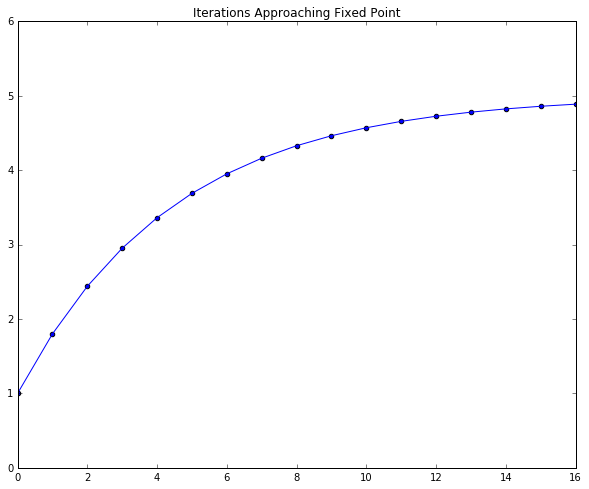

In [5]:
n = 1; y = [n]
x = range(0,20)
for i in x[1:]:
    n = f(n)
    y.append(n)
plt.figure(figsize=(10,8))
plt.title('Iterations Approaching Fixed Point')
plt.scatter(x,y)
plt.plot(x,y)
plt.xlim(0,16)
plt.ylim(0,6)

### Fixed Point

Here, we would say 5 is our fixed point.  This is born out by solving the equation:

$$ x = 0.8x + 1$$
$$ x = 5$$

Similarly, let's examine the behavior of the system created by iterating:

$$n_{i+1} = n_i -n_i^2 +2$$

With a starting value of $n = 1.4$.

In [6]:
n = 1.4
for i in range(1,10):
    n = n - n*n + 2
    print(n)

1.4400000000000002
1.3663999999999998
1.4993510400000003
1.2512974988509178
1.685552068220355
0.8444662935384386
2.13134297261589
-0.41127989430324874
1.4195689542386598


Hmm... Something interesting is happening here.  Let's look a little further down the line...

In [7]:
n = 1.4
for i in range(1,50):
    n = n - n*n + 2
    print(n)

1.4400000000000002
1.3663999999999998
1.4993510400000003
1.2512974988509178
1.685552068220355
0.8444662935384386
2.13134297261589
-0.41127989430324874
1.4195689542386598
1.4043929384004177
1.4320734129714583
1.3812391528317374
1.4734175555164017
1.3024582626124728
1.6060607367649717
1.026629646586928
1.9726612153357272
0.08126894484589875
2.074664303449533
-0.22956766855820243
1.717731016994549
0.7671311702494212
2.1786409378811746
-0.5678353983305899
1.1097275620721503
1.8782323000495522
0.3504757271001211
2.2276424918137625
-0.734748579520466
0.7253959453721914
2.199196667809776
-0.6372693158958462
0.956618503121794
2.0414995426068123
-0.12622083985701193
1.8578474597287786
0.40625027610810305
2.241210989270193
-0.7818157091552842
0.606948487762736
2.238562020965264
-0.7725979007428236
0.6304945830249584
2.2329711638011425
-0.7531890545662865
0.6795171935152571
2.2177735772324056
-0.7007460626378159
0.8082088930597822


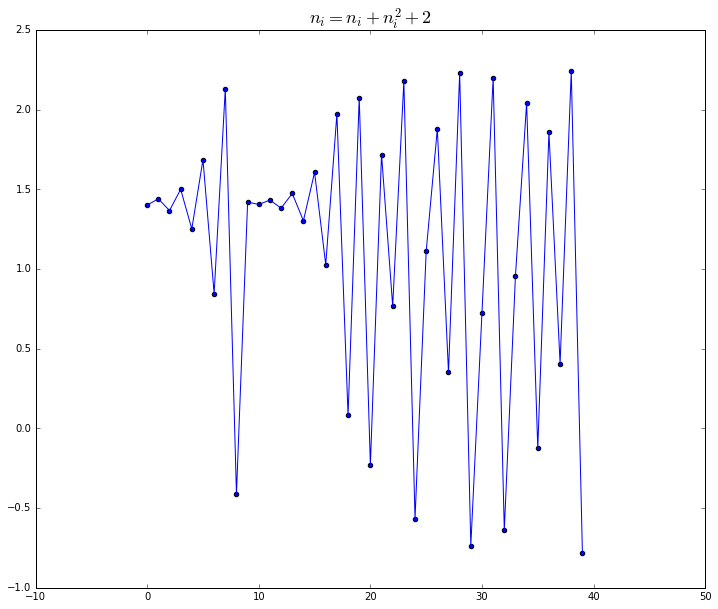

In [8]:
def f(n):
    return n - n*n + 2

n=1.4
y=[n]
x = range(0,40)
for i in x[1:]:
    n = f(n)
    y.append(n)
plt.figure(figsize=(12,10))
plt.scatter(x,y)
plt.plot(x,y)
plt.title('$n_i = n_i + n_i^2 + 2$', fontsize=18)

The terms seem to bouncing around in an organized manner.  If we solve for the fixed points, we see that $n = \pm \sqrt{2}$.  Let's look at these examples from a different perspective with a cobweb diagram.

## Cobweb Plot

A different way to visualize the behavior of the iterations is to look at what is called a cobweb diagram.  The idea is to plot the line $y = x$ on the same axes as a continuous representation of the discrete system.  Here, this results in graphing:

$$y1 = x \quad \text{and} \quad y2 = 0.8x + 1$$

We then start at $x=0$ on $y1$ draw a vertical line to $y2$, a horizontal line to $y1$, a vertical line to $y2$, repeat...

The results demonstrate not only where the fixed point is based on the intersection, but also give use insight into whether or not these points are repelling or attracting.  For example, our fixed point of 5 is an attracting one, as it draws our pencil towards it no matter where we start our iterations.

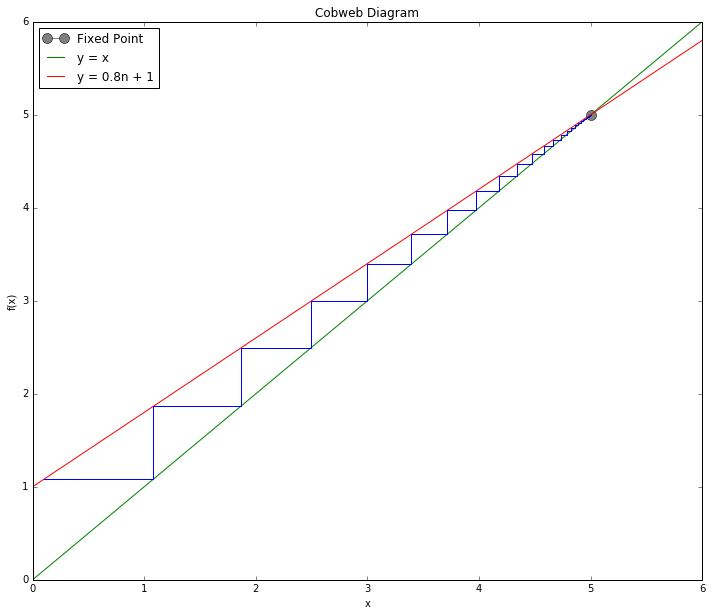

In [9]:
def f(n):
    return 0.8*n + 1

# return f^n(x)
def func_n(x,n):
    for i in range(0,n):
        x = f(x)
    return x


def plot_graphical(x0,n):
    xv = np.linspace(0.0,10.0,2*n)  # create array for points xvalue 
    yv = np.linspace(0.0,10.0,2*n)  # create array for points yvalue 
    x =x0
    for i in range(0,n):  #iterate
        xv[2*i] = x  # first point is (x,f(x))
        x = f(x)
        yv[2*i] = x
        xv[2*i+1] = x #second point is (f(x),f(x))
        yv[2*i+1] = x
    plt.plot(xv,yv,'b')  # connect up all these points blue


plt.figure(figsize=(12,10))
plt.xlabel('x')
plt.ylabel('f(x)')
plt.plot(5,5,  marker = 'o', markersize=10, c='grey',label = 'Fixed Point')
xcon = np.arange(0,7, 0.1)   # to plot function 
plt.plot(xcon,xcon, 'g', label = 'y = x')#y=x plotted gree
alpha=0.81
ycon = f(xcon)                 # function computed
plt.plot(xcon,ycon, 'r', label='y = 0.8n + 1')             # function plotted red
plot_graphical(0.1,500)
plt.legend(loc='best')
plt.xlim(0,6)
plt.ylim(0,6)# cobweb plot, 0.3 is initial condition
plt.title('Cobweb Diagram')



## Different Behavior

We find more interesting examples from the earlier work with the sequences that demonstrated period 2 and period 3 behavior.  Let's examine the cobweb diagram for 

$$f_{n+1} = f_{n} - f_n^2 + 2$$ 

(-1, 2.5)

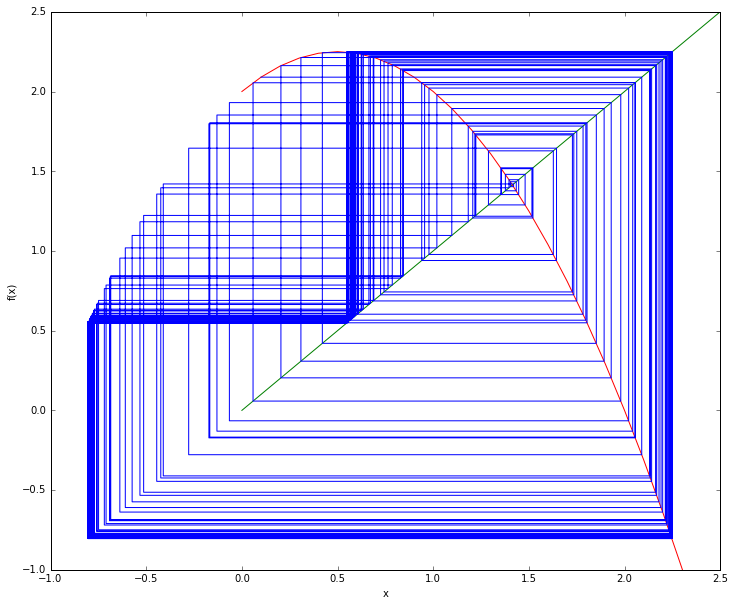

In [10]:
def f(n):
    return n-n*n + 2

# return f^n(x)
def func_n(x,n):
    for i in range(0,n):
        x = f(x)
    return x


def plot_graphical(x0,n):
    xv = np.linspace(0.0,10.0,2*n)  # create array for points xvalue 
    yv = np.linspace(0.0,10.0,2*n)  # create array for points yvalue 
    x =x0
    for i in range(0,n):  #iterate
        xv[2*i] = x  # first point is (x,f(x))
        x = f(x)
        yv[2*i] = x
        xv[2*i+1] = x #second point is (f(x),f(x))
        yv[2*i+1] = x
    plt.plot(xv,yv)  # connect up all these points blue


plt.figure(figsize=(12,10))
plt.xlabel('x')
plt.ylabel('f(x)')
xcon = np.arange(0,7, 0.1)   # to plot function 
plt.plot(xcon,xcon, 'g')#y=x plotted gree
alpha=0.81
ycon = f(xcon)                 # function computed
plt.plot(xcon,ycon, 'r')             # function plotted red
plot_graphical(0.1,5000)
plt.xlim(-1,2.5)
plt.ylim(-1,2.5)# cobweb plot, 0.3 is initial condition

